In [1]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('temp.csv',header=0,squeeze=True)

EDA

In [3]:
data.head()

,Date,"Daily minimum temperatures in Melbourne, Australia, 1981-1990"
0,01-01-1981,20.7
1,02-01-1981,17.9
2,03-01-1981,18.8
3,04-01-1981,14.6
4,05-01-1981,15.8


In [4]:
data['Date'] = pd.to_datetime(data['Date'],errors='coerce',format='%d-%m-%Y')

In [5]:
data = data.rename(columns = {'Daily minimum temperatures in Melbourne, Australia, 1981-1990': 'Temperature'})

In [6]:
data['Temperature'] = data['Temperature'].astype("float64")

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,3650.0,11.177753,4.071837,0.0,8.3,11.0,14.0,26.3


Data Visualization

In [8]:
import seaborn as sns

C:\Users\SOUBHA~1\AppData\Local\Temp/ipykernel_3732/1662080197.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(data.Temperature,model='additive',extrapolate_trend='freq',freq=365)


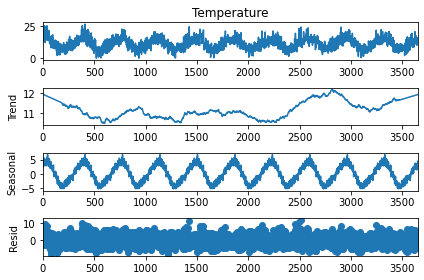

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data.Temperature,model='additive',extrapolate_trend='freq',freq=365)
result.plot()
plt.show()

In [11]:
avg_temp = data.Temperature.mean()

In [13]:
data1 = data.copy()

In [15]:
data1['avg_temp'] = avg_temp

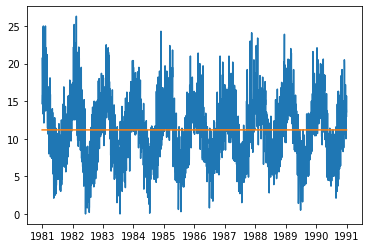

In [17]:
plt.plot(data['Date'],data['Temperature'])
plt.plot(data['Date'],data1['avg_temp'])

In [18]:
series = pd.read_csv('temp.csv',header=0,squeeze=True,index_col=0,parse_dates=True)

In [19]:
series.head()

Date
1981-01-01    20.7
1981-02-01    17.9
1981-03-01    18.8
1981-04-01    14.6
1981-05-01    15.8
Name: Daily minimum temperatures in Melbourne, Australia, 1981-1990, dtype: float64

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

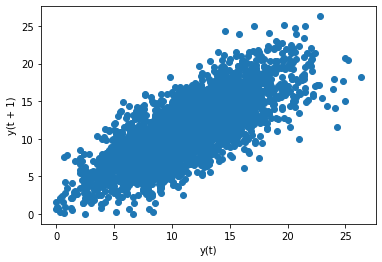

In [20]:
pd.plotting.lag_plot(series)

In [21]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

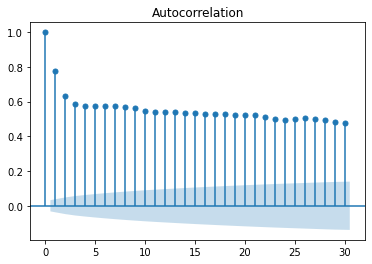

In [22]:
plot_acf(series,lags=30)
plt.show()

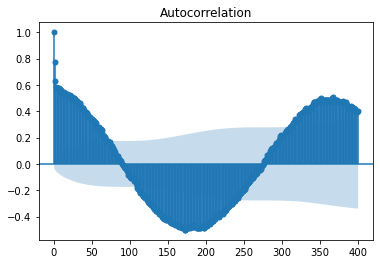

In [23]:
plot_acf(series,lags=400)
plt.show()

In [24]:
values = series.values
train,test = values[0:len(values)-7],values[len(values)-7:]

In [25]:
train

array([20.7, 17.9, 18.8, ..., 13.2, 13.9, 10. ])

Baseline model

In [26]:
#shift the current temperature to the next day
pred_temp = data['Temperature'].to_frame().shift(1).rename(columns={'Temperature':'predicted_Temperature'})
actual_temp = data['Temperature'].to_frame().rename(columns={'Temperature': 'Actual_Temperature'})
one_step_model = pd.concat([pred_temp,actual_temp],axis=1)
one_step_model= one_step_model[1:]
one_step_model.head()

,predicted_Temperature,Actual_Temperature
1,20.7,17.9
2,17.9,18.8
3,18.8,14.6
4,14.6,15.8
5,15.8,15.8


In [27]:
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt

In [28]:
baseline_error = sqrt(MSE(one_step_model.Actual_Temperature,one_step_model.predicted_Temperature))
print("THE RMSE ERROR FOR THE BASELINE MODEL IS" ,baseline_error)

THE RMSE ERROR FOR THE BASELINE MODEL IS 2.731199217222091


AR MODEL

In [29]:
error = []
lags = []
for k in range(1,31):
    model1 = AutoReg(train,lags=k)
    model1_fit=model1.fit()
    pred = model1_fit.predict(start = len(train), end = len(train)+len(test)-1,dynamic=False)
    rmse = np.sqrt(mean_squared_error(test,pred))
    print("for lags = %f, Root Mean Squared Error: %0.3f"%(k,rmse))
    error.append(rmse)
    lags.append(k)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use t

for lags = 1.000000, Root Mean Squared Error: 3.334
for lags = 2.000000, Root Mean Squared Error: 3.240
for lags = 3.000000, Root Mean Squared Error: 2.977
for lags = 4.000000, Root Mean Squared Error: 2.763
for lags = 5.000000, Root Mean Squared Error: 2.468
for lags = 6.000000, Root Mean Squared Error: 2.227
for lags = 7.000000, Root Mean Squared Error: 1.868
for lags = 8.000000, Root Mean Squared Error: 1.726
for lags = 9.000000, Root Mean Squared Error: 1.620
for lags = 10.000000, Root Mean Squared Error: 1.564
for lags = 11.000000, Root Mean Squared Error: 1.531
for lags = 12.000000, Root Mean Squared Error: 1.530
for lags = 13.000000, Root Mean Squared Error: 1.545
for lags = 14.000000, Root Mean Squared Error: 1.575
for lags = 15.000000, Root Mean Squared Error: 1.640
for lags = 16.000000, Root Mean Squared Error: 1.651
for lags = 17.000000, Root Mean Squared Error: 1.627
for lags = 18.000000, Root Mean Squared Error: 1.526
for lags = 19.000000, Root Mean Squared Error: 1.485
fo

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use t

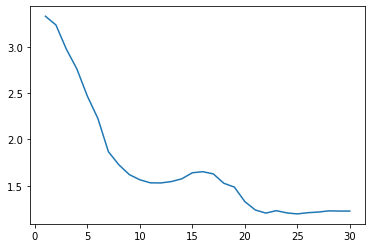

In [30]:
plt.plot(lags,error)

In [31]:
model2 = AutoReg(train,lags=14)
model2_fit=model2.fit()
pred1 = model2_fit.predict(start = len(train), end = len(train)+len(test)-1,dynamic=False)
rmse = np.sqrt(mean_squared_error(test,pred1))
print("for lags = %f, Root Mean Squared Error: %0.3f"%(14,rmse))
for i in range (len(pred1)):
    print('Predicted temperature =%f, Expected Temperature=%f' %(pred1[i],test[i]))

for lags = 14.000000, Root Mean Squared Error: 1.575
Predicted temperature =11.333390, Expected Temperature=12.900000
Predicted temperature =12.469958, Expected Temperature=14.600000
Predicted temperature =12.879503, Expected Temperature=14.000000
Predicted temperature =12.857908, Expected Temperature=13.600000
Predicted temperature =12.842412, Expected Temperature=13.500000
Predicted temperature =12.854446, Expected Temperature=15.700000
Predicted temperature =12.829843, Expected Temperature=13.000000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


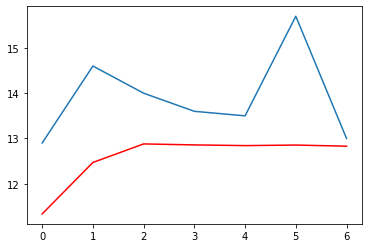

In [32]:
plt.plot(test)
plt.plot(pred1,color='red')
plt.show()

In [33]:
model3 = AutoReg(train,lags=29)
model3_fit=model3.fit()
pred2 = model3_fit.predict(start = len(train), end = len(train)+len(test)-1,dynamic=False)
rmse = np.sqrt(mean_squared_error(test,pred2))
print("for lags = %f, Root Mean Squared Error: %0.3f"%(29,rmse))
for i in range (len(pred2)):
    print('Predicted temperature =%f, Expected Temperature=%f' %(pred2[i],test[i]))

for lags = 29.000000, Root Mean Squared Error: 1.225
Predicted temperature =11.872160, Expected Temperature=12.900000
Predicted temperature =13.055704, Expected Temperature=14.600000
Predicted temperature =13.531810, Expected Temperature=14.000000
Predicted temperature =13.242590, Expected Temperature=13.600000
Predicted temperature =13.091564, Expected Temperature=13.500000
Predicted temperature =13.146082, Expected Temperature=15.700000
Predicted temperature =13.176492, Expected Temperature=13.000000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


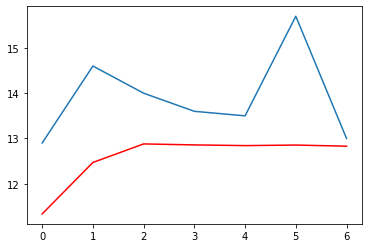

In [34]:
plt.plot(test)
plt.plot(pred1,color='red')
plt.show()

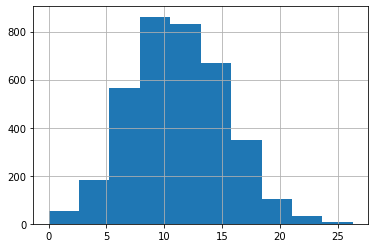

In [35]:
series.hist()
plt.show()

In [36]:
split=round(len(values)/2)
split

1825

In [37]:
x1,x2 = values[0:split],values[split:]

In [38]:
x1.shape,x2.shape

((1825,), (1825,))

In [39]:
x2

array([12.9, 13.8, 10.6, ..., 13.5, 15.7, 13. ])

In [40]:
x1_mean, x2_mean = x1.mean(),x2.mean()
x1_var,x2_var = x1.var(),x2.var()
print(x1_mean,x2_mean)
print(x1_var,x2_var)

11.043506849315069 11.312000000000001
18.160824962281854 14.953757369863014


In [41]:
from statsmodels.tsa.stattools import adfuller

In [42]:
stat = adfuller(values)
stat

(-4.444804924611706,
 0.0002470826300360931,
 20,
 3629,
 {'1%': -3.4321532327220154,
  '5%': -2.862336767636517,
  '10%': -2.56719413172842},
 16642.822304301197)

In [43]:
print("ADF Statistics = %f" %stat[0])
print(" P-Value of Augumented Dickey-Fuller Test=%f" %stat[1])
print("Critical Values")
for key,value in stat[4].items():
    print('{} = {}'.format(key, value))

ADF Statistics = -4.444805
 P-Value of Augumented Dickey-Fuller Test=0.000247
Critical Values
1% = -3.4321532327220154
5% = -2.862336767636517
10% = -2.56719413172842


In [44]:
if(stat[1]<0.05):
    print("OUR TIME SERIES IS STATIONARY")

OUR TIME SERIES IS STATIONARY


SARIMA MODEL

In [45]:
import itertools
import statsmodels.api as sm

In [46]:
#define the p,d,q parameters to take any value between 0 to 2
p=d=q=range(0,2)
#generate different combination of p,d,q triplets
pdq = list(itertools.product(p,d,q))
#generate all different combination of seasonal p,d,q triplets
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [47]:
for para in pdq:
    for para_seasonal in seasonal_pdq:
        
            mode = sm.tsa.statespace.SARIMAX(one_step_model.Actual_Temperature, order=para,seasonal_order=para_seasonal)
            results=mode.fit()
            
            print("SARIMA {}x{}12- AIC:{}".format(para,para_seasonal,results.aic))

SARIMA (0, 0, 0)x(0, 0, 0, 12)12- AIC:28426.777568878115
SARIMA (0, 0, 0)x(0, 0, 1, 12)12- AIC:25324.484666522083
SARIMA (0, 0, 0)x(0, 1, 0, 12)12- AIC:20202.59558754533
SARIMA (0, 0, 0)x(0, 1, 1, 12)12- AIC:19140.7845783081
SARIMA (0, 0, 0)x(1, 0, 0, 12)12- AIC:20207.52724795738
SARIMA (0, 0, 0)x(1, 0, 1, 12)12- AIC:19228.258862541043
SARIMA (0, 0, 0)x(1, 1, 0, 12)12- AIC:19363.092156448693
SARIMA (0, 0, 0)x(1, 1, 1, 12)12- AIC:19122.68271559639
SARIMA (0, 0, 1)x(0, 0, 0, 12)12- AIC:24510.638244502738
SARIMA (0, 0, 1)x(0, 0, 1, 12)12- AIC:22474.66988161682
SARIMA (0, 0, 1)x(0, 1, 0, 12)12- AIC:19224.23347809422
SARIMA (0, 0, 1)x(0, 1, 1, 12)12- AIC:17916.282464815744
SARIMA (0, 0, 1)x(1, 0, 0, 12)12- AIC:19156.18079833465
SARIMA (0, 0, 1)x(1, 0, 1, 12)12- AIC:17991.823847783795
SARIMA (0, 0, 1)x(1, 1, 0, 12)12- AIC:18310.148075866324
SARIMA (0, 0, 1)x(1, 1, 1, 12)12- AIC:17907.35767567993
SARIMA (0, 1, 0)x(0, 0, 0, 12)12- AIC:17685.11329994035
SARIMA (0, 1, 0)x(0, 0, 1, 12)12- AIC:176

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA (1, 1, 1)x(0, 0, 0, 12)12- AIC:16828.095658422208
SARIMA (1, 1, 1)x(0, 0, 1, 12)12- AIC:16830.08276736141
SARIMA (1, 1, 1)x(0, 1, 0, 12)12- AIC:19133.24426397874
SARIMA (1, 1, 1)x(0, 1, 1, 12)12- AIC:16849.70338228718
SARIMA (1, 1, 1)x(1, 0, 0, 12)12- AIC:16830.08314592785
SARIMA (1, 1, 1)x(1, 0, 1, 12)12- AIC:16832.085849511885
SARIMA (1, 1, 1)x(1, 1, 0, 12)12- AIC:18205.255794648907
SARIMA (1, 1, 1)x(1, 1, 1, 12)12- AIC:16851.71122497086


In [48]:
para, para_seasonal

((1, 1, 1), (1, 1, 1, 12))

In [49]:
mode = sm.tsa.statespace.SARIMAX(one_step_model.Actual_Temperature, order=para,seasonal_order=para_seasonal)
results=mode.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


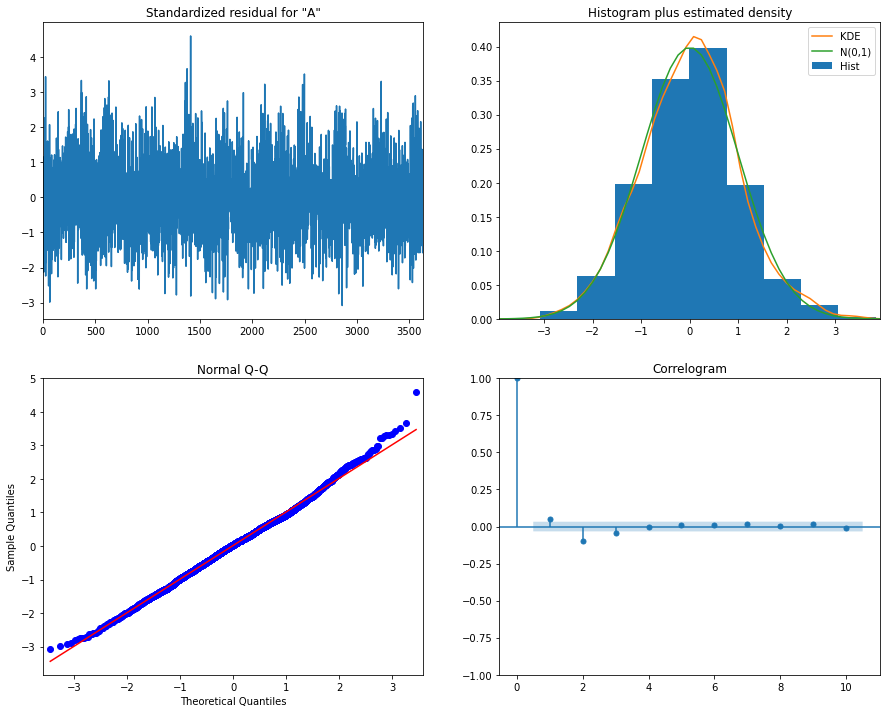

In [50]:
results.plot_diagnostics(figsize=(15,12))
plt.show()